In [226]:
# Capstone 1 Code

In [268]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline
plt.style.use('fivethirtyeight')

df = pd.read_csv('/Users/jdobrow/Desktop/35478-0001-Data.csv')

In [269]:
trust_df = df[df.TRUST == 1]
not_trust_df = df[df.TRUST == 2]
pdict = {}

def testTrust(var,lowerbound,upperbound):
    trust_df = df[df.TRUST == 1]
    not_trust_df = df[df.TRUST == 2]
    trust_df = trust_df[trust_df[var] != lowerbound]
    trust_df = trust_df[trust_df[var] < upperbound]
    not_trust_df = not_trust_df[not_trust_df[var] != lowerbound]
    not_trust_df = not_trust_df[not_trust_df[var] < upperbound]
    
    print('Trust mean:\t\t\t' + str(trust_df[var].mean()))
    print('Doesn\'t trust mean:\t\t' + str(not_trust_df[var].mean()))
    print('p - value from 2 sample t-test: ' + str(stats.ttest_ind(trust_df[var], not_trust_df[var])[1]))
    
    if var not in pdict:
        pdict.update({var : stats.ttest_ind(trust_df[var], not_trust_df[var])[1]})
    plt.show()

In [270]:
# Happiness of Marriage.
trust = [0, 0, 0]
not_trust = [0, 0, 0]

for i in trust_df.HAPMAR:
    if i == 1:
        trust[0] += 1
    elif i == 2:
        trust[1] += 1
    elif i == 3:
        trust[2] += 1
for i in not_trust_df.HAPMAR:
    if i == 1:
        not_trust[0] += 1
    elif i == 2:
        not_trust[1] += 1
    elif i == 3:
        not_trust[2] += 1
test = [trust, not_trust]
hapmar_p = stats.chi2_contingency(test)
print('p-value for chi-square of HAPMAR: ' + str(hapmar_p[1]))
# Not significant!

p-value for chi-square of HAPMAR: 0.05839323074881708


In [271]:
# HLTHPAIN: Body aches or pains in last 4 weeks(never, seldom, sometimes, often, very often)
trust = [0, 0, 0, 0, 0]
not_trust = [0, 0, 0, 0, 0]
for i in trust_df.HLTHPAIN:
    if i == 1:
        trust[0] += 1
    elif i == 2:
        trust[1] += 1
    elif i == 3:
        trust[2] += 1
    elif i == 4:
        trust[3] += 1
    elif i == 5:
        trust[4] += 1
for i in not_trust_df.HLTHPAIN:
    if i == 1:
        not_trust[0] += 1
    elif i == 2:
        not_trust[1] += 1
    elif i == 3:
        not_trust[2] += 1
    elif i == 4:
        not_trust[3] += 1
    elif i == 5:
        not_trust[4] += 1
test = [trust, not_trust]
HLTHPAIN_p = stats.chi2_contingency(test)
print('p-value for chi-square of HLTHPAIN: ' + str(HLTHPAIN_p[1]))
# Not significant

p-value for chi-square of HLTHPAIN: 0.2891154638300809


In [272]:
test_df = df[df.MNTLHLTH != -1]
test_df = test_df[test_df.MNTLHLTH < 98]
trust_test_df = test_df[test_df.TRUST == 1]
not_trust_test_df = test_df[test_df.TRUST == 2]
print("Test for Normality: " + str(stats.shapiro(test_df.MNTLHLTH)))
# p-value is < 0.01, and so the sample does not look Normal, so we'll use a rank-sum test. Our p-value 
# does not reject the null hypothesis...Meaning we cannot show a difference in mental health of trusting
# and not trusting groups.
print("Rank-Sum Result: " + str(stats.ranksums(trust_test_df.MNTLHLTH, not_trust_test_df.MNTLHLTH)[1]))

Test for Normality: (0.630593478679657, 5.184804318001823e-44)
Rank-Sum Result: 0.689279364772261


In [273]:
# PHYSHLTH
test_df = df[df.PHYSHLTH != -1]
test_df = test_df[test_df.PHYSHLTH < 98]
trust_test_df = test_df[test_df.TRUST == 1]
not_trust_test_df = test_df[test_df.TRUST == 2]
print("Test for Normality: "+ str(stats.shapiro(test_df.PHYSHLTH)))
# Not a normal distribution.
print("Rank_Sum Result: " + str(stats.ranksums(trust_test_df.PHYSHLTH, not_trust_test_df.PHYSHLTH)[1]))
# Significant p-value!
# Better to be trusting?
print("Trust mean: " + str(trust_test_df.PHYSHLTH.mean()))
print("Cannot Trust mean: "+ str(not_trust_test_df.PHYSHLTH.mean()))
# On average, People that don't trust have more days of poor physical health.
# Better to be trusting

Test for Normality: (0.5904868245124817, 0.0)
Rank_Sum Result: 0.00015655358392374112
Trust mean: 3.4873737373737375
Cannot Trust mean: 6.073253833049404


In [274]:
# DWELOWN: Do you own or rent your house.
trust = [0, 0]
not_trust = [0, 0]
for i in trust_df.DWELOWN:
    if i == 1:
        trust[0] += 1
    elif i == 2:
        trust[1] += 1
for i in not_trust_df.DWELOWN:
    if i == 1:
        not_trust[0] += 1
    elif i == 2:
        not_trust[1] += 1
test = [trust, not_trust]
dwelown_p = stats.chi2_contingency(test)
print('p-value for chi-square of DWELOWN: ' + str(dwelown_p[1]))
# Is significant!
print("Trust Mean: " + str(trust[0]/(trust[0] + trust[1])))
print("Not Trust Mean: " + str(not_trust[0]/(not_trust[0] + not_trust[1])))
# A higher percentage of people own homes that are trusting

p-value for chi-square of DWELOWN: 9.702143829553362e-05
Trust Mean: 0.725
Not Trust Mean: 0.6241545893719807


In [275]:
# Unemp: Ever unemployed in last 10 years.
trust = [0, 0]
not_trust = [0, 0]
for i in trust_df.UNEMP:
    if i == 1:
        trust[0] += 1
    elif i == 2:
        trust[1] += 1
for i in not_trust_df.UNEMP:
    if i == 1:
        not_trust[0] += 1
    elif i == 2:
        not_trust[1] += 1
test = [trust, not_trust]
chi = stats.chi2_contingency(test)
print('p-value for chi-square test: ' + str(chi[1]))
# Significant
print("Trust Mean: " + str(trust[0]/(trust[0] + trust[1])))
print("Not Trust Mean " + str(not_trust[0]/(not_trust[0] + not_trust[1])))
# A lower percentage of people were unemployed in the trusting group

p-value for chi-square test: 1.8118687914555376e-12
Trust Mean: 0.27792436235708
Not Trust Mean 0.4045918367346939


In [276]:
# CONINC: Family Income
test_df = df[df.CONINC != 0]
trust_test_df = test_df[test_df.TRUST == 1]
not_trust_test_df = test_df[test_df.TRUST == 2]
print("Normality Test: " + str(stats.shapiro(test_df.CONINC))) # not normal
print("Rank-sum Test: " + str(stats.ranksums(trust_test_df.CONINC, not_trust_test_df.CONINC)[1])) # Significant difference
print("Trust mean: " + str(trust_test_df.CONINC.mean()))
print("Not Trust mean: " + str(not_trust_test_df.CONINC.mean()))
# Trusting people have a higher income on average

Normality Test: (0.7940887212753296, 0.0)
Rank-sum Test: 2.744989324114447e-41
Trust mean: 62978.99802772473
Not Trust mean: 41638.77034811908


In [277]:
# TVHOURS: Hours/day watching TV
test_df = df[df.TVHOURS != -1]
test_df = test_df[test_df.TVHOURS < 98]
trust_test_df = test_df[test_df.TRUST == 1]
not_trust_test_df = test_df[test_df.TRUST == 2]
print("Normality Test: " + str(stats.shapiro(test_df.TVHOURS))) # not normal
print("Rank-sum Test: " + str(stats.ranksums(trust_test_df.TVHOURS, not_trust_test_df.TVHOURS)[1])) # Significant difference
print("Trust mean: " + str(trust_test_df.TVHOURS.mean()))
print("Cannot Trust mean: " + str(not_trust_test_df.TVHOURS.mean()))
# Not trusting group watches more TV on average

Normality Test: (0.7530732154846191, 0.0)
Rank-sum Test: 1.7460452518348267e-09
Trust mean: 2.5037593984962405
Cannot Trust mean: 3.303977272727273


In [278]:
# General Happiness
trust = [0, 0, 0, 0, 0, 0, 0]
not_trust = [0, 0, 0, 0, 0, 0, 0]
for i in trust_df.HAPPY7:
    if i < 8:
        if i != 0:
            trust[i - 1] += 1
for i in not_trust_df.HAPPY7:
    if i < 8:
        if i != 0:
            not_trust[i - 1] += 1
test = [trust, not_trust]
chi = stats.chi2_contingency(test)
print('p-value for chi-square test: ' + str(chi[1]))
# Not significant

p-value for chi-square test: 0.2449052888922876


In [279]:
# SMOKEDAY: How many cigarettes a day 1 = do not smoke never did, 2 = do not smoke, but smoked in past, 3 = 1 - 5
# 4 = 6 - 10, 7 = >40
trust = [0, 0, 0, 0, 0, 0, 0]
not_trust = [0, 0, 0, 0, 0, 0, 0]
for i in trust_df.SMOKEDAY:
    if i < 8:
        if i != 0:
            trust[i - 1] += 1
for i in not_trust_df.SMOKEDAY:
    if i < 8:
        if i != 0:
            not_trust[i - 1] += 1
test = [trust, not_trust]
chi = stats.chi2_contingency(test)
print('p-value for chi-square test: ' + str(chi[1]))
# Not significant

p-value for chi-square test: 0.011742107028616753


In [280]:
# HLTHENGY, number of days felt healthy, full of energy
test_df = df[df.HLTHENGY != -1]
test_df = test_df[test_df.HLTHENGY < 98]
trust_test_df = test_df[test_df.TRUST == 1]
not_trust_test_df = test_df[test_df.TRUST == 2]
print("Normality Test: " + str(stats.shapiro(test_df.HLTHENGY))) # not normal
print("Rank-sum Test: " + str(stats.ranksums(trust_test_df.HLTHENGY, not_trust_test_df.HLTHENGY)[1])) # Significant
print("Trust mean: " + str(trust_test_df.HLTHENGY.mean()))
print("Not Trust mean: " + str(not_trust_test_df.HLTHENGY.mean()))
# Trusting people had more days where they felt healthy, full of energy

Normality Test: (0.8161655068397522, 9.279067724321358e-39)
Rank-sum Test: 0.0004128354974944465
Trust mean: 21.84130982367758
Not Trust mean: 18.95084745762712


In [281]:
# DRINK4: how often drink >=4 drinks on a day
trust = [0, 0, 0, 0, 0]
not_trust = [0, 0, 0, 0, 0]
for i in trust_df.DRINK4:
    if i < 6:
        if i !=0:
            trust[i - 1] += 1
for i in not_trust_df.DRINK4:
    if i < 5:
        if i !=0:
            not_trust[i - 1] += 1
test = [trust, not_trust]
chi = stats.chi2_contingency(test)
print('p-value for chi-square test: ' + str(chi[1]))

p-value for chi-square test: 0.00034878014841351247


In [282]:
# PHYSACT: how often 20 min or physical activcity
trust = [0, 0, 0, 0, 0]
not_trust = [0, 0, 0, 0, 0]
for i in trust_df.PHYSACT:
    if i != 0:
        if i < 6:
            trust[i - 1] += 1
for i in not_trust_df.PHYSACT:
    if i != 0:
        if i < 6:
            not_trust[i - 1] += 1
test = [trust, not_trust]
chi = stats.chi2_contingency(test)
print('p-value for chi-square test: ' + str(chi[1]))
# Not significant

p-value for chi-square test: 0.1385385045803943


In [283]:
# FRTVEGS: how often R eats fresh fruit/veggies
trust = [0, 0, 0, 0, 0]
not_trust = [0, 0, 0, 0, 0]
for i in trust_df.FRTVEGS:
    if i != 0:
        if i < 6:
            trust[i - 1] += 1
for i in not_trust_df.FRTVEGS:
    if i != 0:
        if i < 6:
            not_trust[i - 1] += 1
test = [trust, not_trust]
chi = stats.chi2_contingency(test)
print('p-value for chi-square test: ' + str(chi[1]))
print("Trust Daily Veggies: " + str(trust[4]/(trust[0] + trust[1] + trust[2] + trust[3] + trust[4])))
print("Cannot Trust Daily Veggies: " + str(not_trust[4]/(not_trust[0] + not_trust[1] + not_trust[2] + not_trust[3] + not_trust[4])))
# Significant!
# 61% of trusting people eat daily veggies or veggies, but only 45% of not trusting eat daily fruit or veggies

p-value for chi-square test: 1.3887003528721137e-06
Trust Daily Veggies: 0.6120906801007556
Cannot Trust Daily Veggies: 0.4510135135135135


In [284]:
# LOCKEDUP: Have you ever spent any time in prison or jail
trust = [0, 0]
not_trust = [0, 0]
for i in trust_df.LOCKEDUP:
    if i == 1:
        trust[0] += 1
    elif i == 2:
        trust[1] += 1
for i in not_trust_df.LOCKEDUP:
    if i == 1:
        not_trust[0] += 1
    elif i == 2:
        not_trust[1] += 1
test = [trust, not_trust]
chi = stats.chi2_contingency(test)
print('p-value for chi-square test: ' + str(chi[1]))
print("Trust Percent: " + str(trust[0]/(trust[0] + trust[1])))
print("Cannot Trust Percent: " + str(not_trust[0]/(not_trust[0] + not_trust[1])))
# not trust almost twice as likely to have spent any time in prison or jail

p-value for chi-square test: 0.001060735507256257
Trust Percent: 0.10552763819095477
Cannot Trust Percent: 0.18085106382978725


In [285]:
trust = [0, 0]
not_trust = [0, 0]
for i in trust_df.EVIDU:
    if i == 1:
        trust[0] += 1
    elif i == 2:
        trust[1] += 1
for i in not_trust_df.EVIDU:
    if i == 1:
        not_trust[0] += 1
    elif i == 2:
        not_trust[1] += 1
chi = stats.chi2_contingency(test)
print('p-value for chi-square test: ' + str(chi[1]))
print("Trust Percent: " + str(trust[0]/(trust[0] + trust[1])))
print("Cannot Trust Percent: " + str(not_trust[0]/(not_trust[0] + not_trust[1])))
# WOW trusting people more likely to have injected drugs in their life!

p-value for chi-square test: 0.001060735507256257
Trust Percent: 0.024
Cannot Trust Percent: 0.020435967302452316


In [286]:
# Years in school
test_df = df[df.EDUC < 97]
trust_test_df = test_df[test_df.TRUST == 1]
not_trust_test_df = test_df[test_df.TRUST == 2]
print("Normality: " + str(stats.shapiro(test_df.EDUC))) # not normal
print("Rank-sum: " + str(stats.ranksums(trust_test_df.EDUC, not_trust_test_df.EDUC)[1])) #Significant
print("Trust mean: " + str(trust_test_df.EDUC.mean()))
print("Cannot Trust mean: " + str(not_trust_test_df.EDUC.mean()))
# Trusters spent more time in school.

Normality: (0.9533355832099915, 1.1200342310375239e-36)
Rank-sum: 6.922859108787968e-62
Trust mean: 14.786279683377309
Cannot Trust mean: 12.925038245792964


In [287]:
# Creating a new BMI variable from height and weight
height_list = list(df.RHEIGHT)
for i in range(len(height_list)):
    if height_list[i] == 0:
        height_list[i] = 0.0001
weight_list = list(df.RWEIGHT)
bmi_list = []
for i in range(len(df.RWEIGHT)):
    bmi_list.append(703 * weight_list[i]/(height_list[i]**2))
df['BMI'] = bmi_list

In [288]:
test_df = df
trust_test_df = test_df[test_df.TRUST == 1]
not_trust_test_df = test_df[test_df.TRUST == 2]
print(stats.shapiro(test_df.BMI)) # not normal
print(stats.ranksums(trust_test_df.BMI, not_trust_test_df.BMI))
# Not significant

(0.4811381697654724, 0.0)
RanksumsResult(statistic=2.0756177817019004, pvalue=0.03792931552231392)


In [289]:
# Significant: PHYSHLTH, DWELOWN, UNEMP, CONINC, TVHOURS, HLTHENGY, FRTVEGS, LOCKEDUP, EVIDU
# Not: HAPMAR, HLTHPAIN, MNTLHLTH, SMOKEDAY, DRINK4, PHYSACT, HAPPY7

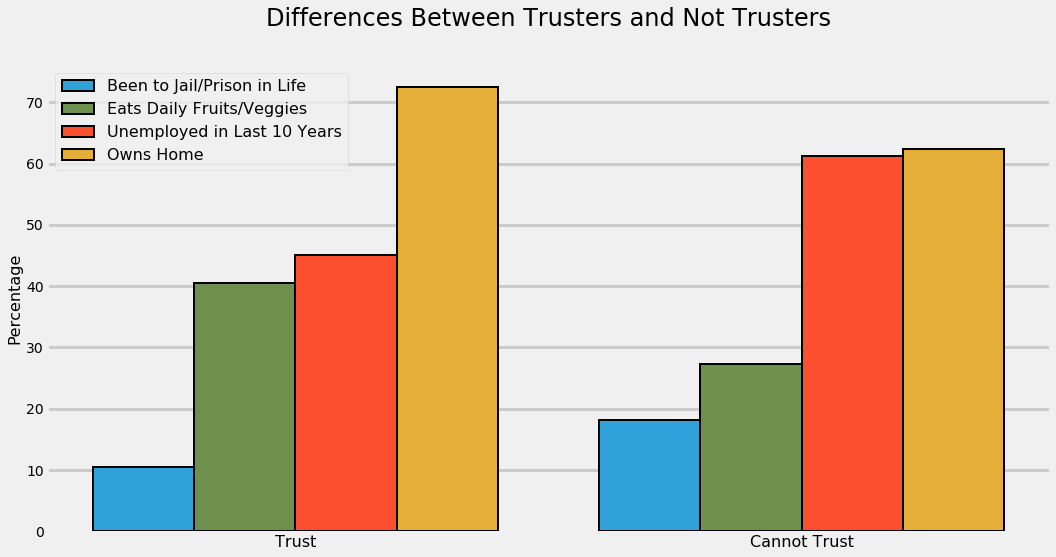

In [290]:
mjail = (10.55, 18.08)
mveg = (40.46, 27.29)
mwork = (45.1, 61.20)
mown = (72.5, 62.41)
fig, ax = plt.subplots(figsize=(16,8))
barw = 0.4

plt.grid(axis='y', linewidth=3, zorder=0)
plt.grid(b=False, axis='x')

rects1 = plt.bar([.1, 2.1], mjail, barw, label='Been to Jail/Prison in Life', zorder=3, color='#30a2da', edgecolor='black', linewidth=2)
rects2 = plt.bar([.1 + barw, 2.1 + barw], mveg, barw, label='Eats Daily Fruits/Veggies', zorder=3, color='#6d904f', edgecolor='black', linewidth=2)
rects3 = plt.bar([.1 + 2 * barw, 2.1 + 2 * barw], mwork, barw, label='Unemployed in Last 10 Years', zorder=3, color='#fc4f30', edgecolor='black', linewidth=2)
rects4 = plt.bar([.1 + 3 * barw, 2.1 + 3 * barw], mown, barw, label='Owns Home', zorder=3, color='#e5ae38', edgecolor='black', linewidth=2)
color=('#30a2da','#6d904f', '#fc4f30','#e5ae38')

plt.ylabel('Percentage', fontsize=16)
plt.title('Differences Between Trusters and Not Trusters', fontsize=24, y=1.07)
plt.xticks([.7,2.7], ('Trust', 'Cannot Trust'), fontsize=16)
plt.legend(loc="upper left", fontsize=16)
plt.show()

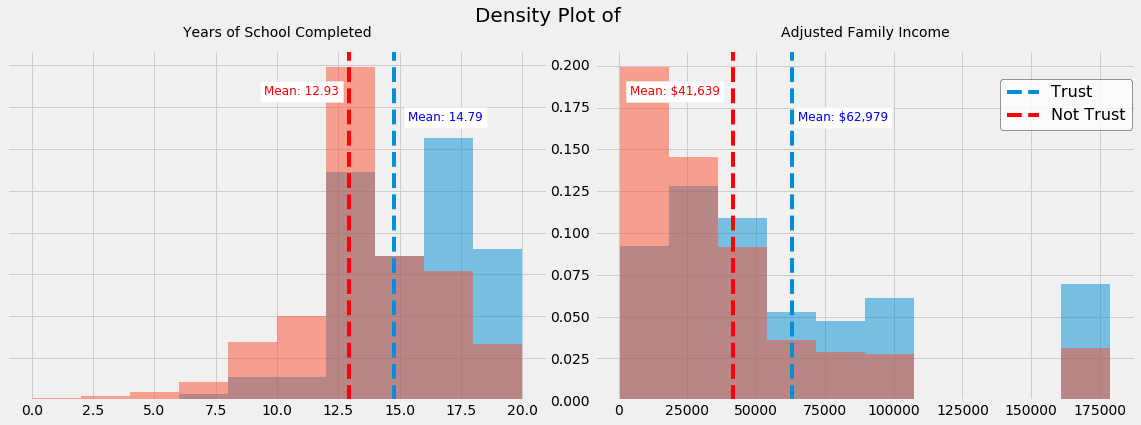

In [291]:
# Decided not to include this graph because it was too messy
educ_df = df[df.EDUC < 97]
trust_df = educ_df[educ_df.TRUST == 1]
not_trust_df = educ_df[educ_df.TRUST == 2]

inc_df = df[df.CONINC != 0]
trust_inc_df = inc_df[inc_df.TRUST == 1]
not_trust_inc_df = inc_df[inc_df.TRUST == 2]

fig, ax1 = plt.subplots(1,2,figsize=(18,6))
fig.subplots_adjust(wspace=0.09)
fig.suptitle('Density Plot of ', fontsize=20)
plt.yticks([0,.0000025,.000005,.0000075,.00001,.0000125,.000015,.0000175,.00002], alpha=0)

n1, bins1, patches1 = ax1[0].hist(trust_df.EDUC, density=True, alpha =.5)
n2, bins2, patches2 = ax1[0].hist(not_trust_df.EDUC, density=True, alpha =.5)
ax1[0].axvline(x = trust_df.EDUC.mean(), ls='--', lw='4')
ax1[0].axvline(x = not_trust_df.EDUC.mean(), color = 'r', ls='--', lw='4')
ax1[0].set_title('Years of School Completed', fontsize=14, y = 1.02)

ax1[1].hist(trust_inc_df.CONINC, density=True, alpha =.5)
ax1[1].hist(not_trust_inc_df.CONINC, density=True, alpha =.5)
ax1[1].axvline(x = trust_inc_df.CONINC.mean(), ls='--', lw='4')
ax1[1].axvline(x = not_trust_inc_df.CONINC.mean(), color = 'r', ls='--', lw='4')
ax1[1].set_title('Adjusted Family Income', fontsize=14, y = 1.02)
ax1[0].yaxis.tick_right()

fig.legend(('Trust','Not Trust'), fontsize=16, bbox_to_anchor=(.88,.82), facecolor='w',edgecolor = 'black',)

fig.text(0.307, 0.77, "Mean: " + str(round(not_trust_df.EDUC.mean(),2)), ha='center', va='bottom', color='red', fontsize = 12, bbox=dict(facecolor='white'))
fig.text(0.418, 0.71, "Mean: " + str(round(trust_df.EDUC.mean(),2)), ha='center', va='bottom', color='blue', fontsize = 12, bbox=dict(facecolor='white'))
fig.text(0.725, 0.71, "Mean: $62,979", ha='center', va='bottom', color='blue', fontsize = 12, bbox=dict(facecolor='white'))
fig.text(0.595, 0.77, "Mean: $41,639", ha='center', va='bottom', color='red', fontsize = 12, bbox=dict(facecolor='white'))
plt.show()


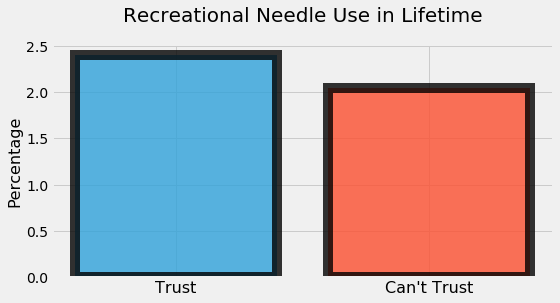

In [292]:
# This one took up space.
evidu_df = df[df.EVIDU < 3]
evidu_df = evidu_df[evidu_df.EVIDU != 0]
trust_evidu_df = evidu_df[evidu_df.TRUST == 1]
not_trust_evidu_df = evidu_df[evidu_df.TRUST == 2]

trustIV = len(trust_evidu_df[trust_evidu_df.EVIDU == 1]) / len(trust_evidu_df[trust_evidu_df.EVIDU < 3])
nottrustIV = len(not_trust_evidu_df[not_trust_evidu_df.EVIDU == 1]) / len(not_trust_evidu_df[not_trust_evidu_df.EVIDU < 3])

plt.figure(figsize=(8,4))
plt.bar([1,2],(100 * trustIV, 100 * nottrustIV), color=('#30a2da', '#fc4f30'), edgecolor='black', linewidth=10, tick_label = ('Trust', 'Can\'t Trust'), alpha=.8)
plt.ylabel("Percentage", fontsize = 16)
plt.xticks([1,2], fontsize=16)
plt.title('Recreational Needle Use in Lifetime', fontsize = 20, y = 1.07)

plt.show()

In [293]:
# Q2 Astrological Sign

In [296]:
def testZodiac(var, lowerbound, upperbound):

    array = []
    test_list = []
    
    size = 0
    test_df = df[df.ZODIAC != 99]
    test_df = test_df[test_df[var] != lowerbound]
    test_df = test_df[test_df[var] < upperbound]
    
    size = len(list(np.unique(test_df[var])))
    
    for i in range(size):
        array.append([0,0,0,0,0,0,0,0,0,0,0,0])
    for i in range(len(test_df[var])):
        try:
            array[test_df[var][i] - 1][test_df.ZODIAC[i] - 1] += 1
        except:
            None
    print(var)
    pval = stats.chi2_contingency(array)[1]
    print(pval)
    if pval < 0.05:
        if var in pdict:
            None
        else:
            pdict[var] = pval
            
def makeCategorical(var, lowerbound, upperbound):
    var_list = []
    test_df = df[df[var] != lowerbound]
    test_df = test_df[test_df[var] < upperbound]
    maxval = max(test_df[var])
    for i in df[var]:
        if i == lowerbound:
            var_list.append(-1)
        elif i >= upperbound:
            var_list.append(8)
        elif i < (maxval / 3):
            var_list.append(0)
        elif i < (2 * maxval / 3):
            var_list.append(1)
        else:
            var_list.append(2)
    df['cat' + var] = var_list
    testZodiac('cat' + var, -1, 8)
    

In [297]:
pdict = {}
cont_list = []
cat_list = []
for i in df:
    if len(np.unique(df[i])) > 10:
        cont_list.append(i)
    else:
        cat_list.append(i)

In [298]:
for i in cont_list:
    bad_vars = []
    try:
        array = list(df[i])
        if -1 in array:
            vmin = -1
        else:
            vmin = 0
        if max(array) < 10:
            vmax = 8
        elif max(array) < 100:
            vmax = 98
        elif max(array) < 1000:
            vmax = 998
        elif max(array) < 10000:
            vmax = 9998
        elif max(array) < 100000:
            vmax = 99998
        elif max(array) < 1000000:
            vmax = 999998
        else:
            vmax = 9999998
        makeCategorical(i, vmin, vmax)
    except:
        bad_vars.append(i)

catID
catINTID
0.252909958068931
catFEELEVEL
0.19808297174588158
catDATEINTV
0.10016757337415562
catLNGTHINV
0.873833340911301
catINTAGE
0.7190350431991077
catINTYRS
0.06863520530267449
catHRS1
0.2537266659020298
catHRS2
nan


/anaconda3/lib/python3.7/site-packages/scipy/stats/contingency.py:107: RuntimeWarning: invalid value encountered in true_divide
  expected = reduce(np.multiply, margsums) / observed.sum() ** (d - 1)


catOCC10
0.5945618193213291
catINDUS10
0.6886656170750726
catSPHRS1
0.07510976083022902
catSPHRS2
nan
catSPOCC10
0.454703452346811
catSPIND10
0.9759288000875358
catPAOCC10
0.39145038486986977
catPAIND10
0.3260894102561211
catMAOCC10
0.2168535115494213
catMAIND10
0.6717521363006003
catSIBS
0.6682268472265598
catAGE
0.3579244009015217
catAGEKDBRN
0.21364264279343861
catEDUC
0.8241516406661781
catPAEDUC
catMAEDUC
catSPEDUC
catMAJOR1
0.5245157080477059
catMAJOR2
catWHENHS
1.0
catWHENCOL
1.0
catVOEDNME1
0.022331887422712825
catVOEDNME2
catHOMPOP
0.90979109443716
catUNRELAT
0.7712449414246001
catINCOME
0.3091701039211455
catRINCOME
0.7639447991922946
catINCOME06
0.34430639480372327
catRINCOM06
0.6564229148129272
catSIZE
0.7107226040092499
catVISART
0.9667610390112423
catVISNHIST
catVISZOO
0.641122370443985
catVISSCI
catVISLIB
0.09388286941904528
catPRFMWHY8
nan
catARTWHY8
nan
catREFRTWHY
nan
catRELIG
0.5752177336698331
catDENOM
0.8187573457996979
catOTHER
catRELIG16
0.6603421169105823
catDEN

In [299]:
for i in cat_list:
    bad_vars = []
    try:
        array = list(df[i])
        if -1 in array:
            vmin = -1
        else:
            vmin = 0
        if max(array) < 10:
            vmax = 8
        elif max(array) < 100:
            vmax = 98
        elif max(array) < 1000:
            vmax = 998
        elif max(array) < 10000:
            vmax = 9998
        elif max(array) < 100000:
            vmax = 99998
        elif max(array) < 1000000:
            vmax = 999998
        else:
            vmax = 9999998
        testZodiac(i, vmin, vmax)
    except:
        bad_vars.append(i)

YEAR
1.0
FEEUSED
0.962018278424727
INTETHN
MODE
0.32488554675850984
INTSEX
0.3922584607810811
CONSENT
0.1627675304892808
BALLOT
0.5184077099644657
VERSION
0.5184077099644657
PHASE
0.07520492217290699
SPANSELF
SPANINT
SPANENG
0.26071224101528856
SAMPTYPE
nan
WRKSTAT
0.3084493072894965
EVWORK
0.9099763875223306
WRKSLF
0.6172953746873984
WRKGOVT
0.11401597141676308
MARITAL
0.9423034301944859
DIVORCE
0.6715331865435723
WIDOWED
0.384553518696694
SPWRKSTA
0.9829029338829902
SPEVWORK
0.761180026415746
SPWRKSLF
0.4484362571396121
PAWRKSLF
0.9920733959693242
MAWRKSLF
0.9783761552916369
CHILDS
0.45174932573122434
DEGREE
0.7720631942026067
PADEG
MADEG
SPDEG
DIPGED
SPDIPGED
SECTOR
EFTOTLT
0.46790985654295225
BARATE
0.5240796006008367
GRADTOUNDER
0.6531428030139032
VOEDCOL
0.1870969183580594
VOEDNCOL
0.5137191800930667
SPSECTOR
SPEFTOTLT
SPBARATE
0.22565058896664575
SPGRADTOUNDER
0.46860501556781187
SEX
0.1566849708581277
RACE
0.5570106091369806
RES16
0.9127814943498253
REG16
0.06586488617979393
MO

RELATE12
nan
GENDER12
nan
12-Mar
nan
AWAY12
1.0
WHERE12
1.0
RELATE13
nan
GENDER13
nan
OLD13
nan
13-Mar
1.0
AWAY13
WHERE13
RELATE14
1.0
GENDER14
1.0
OLD14
nan
14-Mar
1.0
AWAY14
WHERE14
RELHHD1
1.0
RELHHD6
RELHHD7
nan
RELHHD8
nan
RELHHD9
nan
RELHHD10
1.0
RELHHD12
nan
RELHHD13
nan
RELHHD14
nan
HHRACE
0.6533745950074022
FAMGEN
0.9620456369750133
RPLACE
0.033183655777896164
RVISITOR
0.5132810583182763
VISITORS
RELHH1
1.0
RELHH7
nan
RELHH8
nan
RELHH9
nan
RELHH10
nan
RELHH13
nan
RELHH14
nan
RELSP1
RELSP2
1.0
RELSP7
nan
RELSP8
nan
RELSP9
nan
RELSP10
nan
RELSP12
nan
RELSP13
nan
RELSP14
1.0
USWAR
0.6914477396250432
USWARY
0.9329156013748026
INTRACE2
INTRACE3
nan
WHOELSE1
0.3417568073095165
WHOELSE2
0.2706223287574782
WHOELSE3
0.5677514560010626
WHOELSE4
0.14259620357747113
WHOELSE5
0.07146723128861432
WHOELSE6
0.11110667386633515
MARELIG
MAJEW
PARELIG
PAJEW
GOD
0.8968901265294686
REBORN
0.25113637936701483
SAVESOUL
0.7996233804955173
WLTHWHTS
0.9761325931840573
WLTHBLKS
0.757226673274015
WLTHHSP

HHWKFAIR
0.7347737049576033
DECKIDS
0.4122729912644134
HAPPY7
0.8965134756473071
SATJOB7
0.30939830765318344
SATFAM7
0.7325713842683487
TWOINCS1
0.09208834596788579
EARNSHH
0.19683186298666697
SSFCHILD
0.6510279079023686
SSMCHILD
0.7728877459883227
KIDFINBU
0.6143517135449229
KIDJOB
0.2018340592165789
KIDSOCST
0.5850461147063876
ELDERSUP
0.1826477647928872
PAIDLV
0.9234544147932876
PAIDLVPY
0.7547599040970572
PAIDLVDV
FAMWKBST
FAMWKLST
0.166986496399927
CAREPROV
0.46020536257733025
CARECOST
0.8774577848450611
ELDHELP
0.9408431969116914
ELDCOST
0.47121348718183076
HHCLEAN1
0.672782577900705
WKNDACT
TIREDHM1
0.16130743236144174
JOBVSFA1
0.33358779570727964
TIREDWK1
0.12244371372493022
FAMVSWK1
0.39960425930394033
WKKIDSCL
0.9395539080810879
WKYNGSCL
0.7911348584143358
WKKIDSCS
0.7087195411796811
WKYNGSCS
0.9968685990782234
BOSSEMPS
0.5147556280791095
LOCALNUM
0.3614788441650271
CONSCHLS
nan
BUSGRN
nan
PEOPGRN
nan
KNWCAUSE
nan
KNOWSOL
nan
GRNCON
nan
INFOBIZ
nan
INFOGRN
nan
INFOGOVT
nan
IN

In [300]:
# I visually inspected everything, and the only variable with p < 0.0001 was LIVEWHTS**
livewhts_list = list(df['LIVEWHTS'])
for i in range(len(livewhts_list)):
    if livewhts_list[i] == 5:
        livewhts_list[i] = 4
df['LIVEWHTS2'] = livewhts_list
testZodiac('LIVEWHTS2', 0, 8)

LIVEWHTS2
5.660984832616098e-05


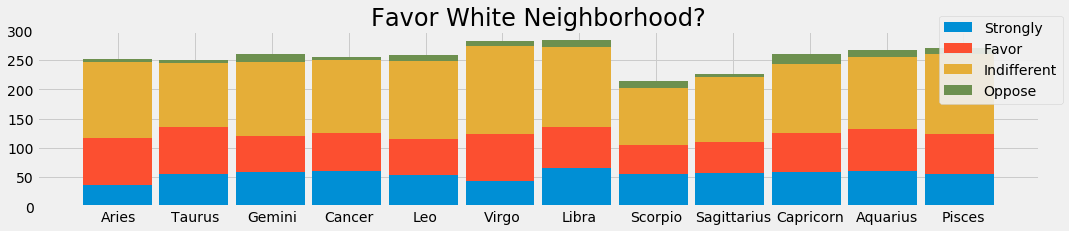

In [397]:
plt.figure(figsize=(16,3))
test_df = df[df.ZODIAC < 98]
plt.title('Favor White Neighborhood?', fontsize=24)
plt.hist([test_df.ZODIAC[test_df.LIVEWHTS==1],test_df.ZODIAC[test_df.LIVEWHTS==2],test_df.ZODIAC[test_df.LIVEWHTS==3],test_df.ZODIAC[test_df.LIVEWHTS==4]],stacked=True,bins=12, rwidth=0.9, label=("Strongly","Favor","Indifferent","Oppose"))
plt.xticks(np.arange(1.47,12,.92), labels=['Aries', 'Taurus', 'Gemini', 'Cancer', 'Leo', 'Virgo', 'Libra', 'Scorpio', 'Sagittarius', 'Capricorn', 'Aquarius', 'Pisces'])
plt.legend(bbox_to_anchor=(.03,.13,1,1), framealpha=.9)
plt.show()

In [302]:
# Question 3 Reborn
df = pd.read_csv('/Users/jdobrow/Desktop/35478-0001-Data.csv')
reborn_df = df[df.REBORN == 1]
not_reborn_df = df[df.REBORN == 2]
pdict = {}
typelist = [0,0,0,0]

In [303]:
def ttestReborn(var, lowerbound, upperbound):
    reborn = reborn_df[reborn_df[var] != lowerbound]
    reborn = reborn[reborn[var] < upperbound]
    not_reborn = not_reborn_df[not_reborn_df[var] != lowerbound]
    not_reborn = not_reborn[not_reborn[var] < upperbound]
    if var not in pdict:
        pdict.update({var : stats.ttest_ind(reborn_df[var], not_reborn_df[var])[1]})
        typelist[0] += 1
        
def rankSumReborn(var, lowerbound, upperbound):
    reborn = reborn_df[reborn_df[var] != lowerbound]
    reborn = reborn[reborn[var] < upperbound]
    not_reborn = not_reborn_df[not_reborn_df[var] != lowerbound]
    not_reborn = not_reborn[not_reborn[var] < upperbound]
    test_df = df[df[var] != lowerbound]
    test_df = test_df[test_df[var] < upperbound]
    if stats.shapiro(test_df[var])[1] > 0.05:
        ttestReborn(var, lowerbound, upperbound)
    else:
        if var not in pdict:
            pdict.update({var : stats.ranksums(reborn[var], not_reborn[var])[1]})
            typelist[1] += 1
            
def chiSquareTestReborn(var, lowerbound, upperbound):
    reborn_list = []
    not_reborn_list = []
    reborn = reborn_df[reborn_df[var] != lowerbound]
    reborn = reborn[reborn[var] < upperbound]
    not_reborn = not_reborn_df[not_reborn_df[var] != lowerbound]
    not_reborn = not_reborn[not_reborn[var] < upperbound]
    
    if len(list(np.unique(reborn[var]))) >= len(list(np.unique(not_reborn[var]))):
        size = len(list(np.unique(reborn[var])))
    else:
        size = len(list(np.unique(not_reborn[var])))
        
    for i in range(size):
        reborn_list.append(0)
        not_reborn_list.append(0)
    for i in reborn[var]:
        reborn_list[i - 1] += 1
    for i in not_reborn[var]:
        not_reborn_list[i - 1] += 1
    test = [reborn_list, not_reborn_list]
    
    if var not in pdict:
            pdict.update({var : stats.chi2_contingency(test)[1]})
            typelist[2] += 1

def distType(v, low, up):
    if len(np.unique(df[v])) > 10:
        rankSumReborn(v, low, up)
        return None
    else:
        chiSquareTestReborn(v, low, up)
        return None

In [304]:
for i in df:
    bad_vars=[]
    try:
        array = list(df[i])
        if -1 in array:
            vmin = -1
        else:
            vmin = 0
        if max(array) < 10:
            vmax = 8
        elif max(array) < 100:
            vmax = 98
        elif max(array) < 1000:
            vmax = 998
        elif max(array) < 10000:
            vmax = 9998
        elif max(array) < 100000:
            vmax = 99998
        elif max(array) < 1000000:
            vmax = 999998
        else:
            vmax = 9999998
        distType(i, vmin, vmax)
    except:
        bad_vars.append(i)
        typelist[3] += 1

plist = list(pdict.values())
plist.sort()
for i in plist:
    for j in pdict:
        if pdict[j] == i:
            print(j + "  " + str(pdict[j]))

SAVESOUL  0.0
GOD  1.6124574501877467e-214
BIBLE  5.042340344685827e-206
PRAY  3.8965269656580993e-202
RELPERSN  6.646047536470498e-175
FUND  1.6295252428134707e-172
RELITEN  5.945598375531731e-158
SPRTPRSN  9.720339179708372e-148
PREMARSX  8.668076088071056e-118
RELACTIV  1.200950319366665e-115
HOMOSEX  2.424761929363443e-113
RELIG  8.612783619110884e-102
FUND16  4.111957243854445e-101
MARHOMO  1.7361742145931308e-82
REG16  2.354277307851288e-75
REGION  1.15044381655582e-73
RDSCRPT  4.66107537884103e-73
SPFUND  9.578680908776758e-61
LETDIE1  1.6178346274090465e-56
PRAYER  1.3737587041255045e-55
SUICIDE1  6.856229635547321e-55
RACE  3.362270219359458e-54
ATTEND  1.2799307277531263e-50
RELIG16  1.4058593131156244e-50
POSTLIFE  6.429515220672382e-48
EVOLVED  2.5481125384125456e-47
ABRAPE  6.729950907191979e-47
ABNOMORE  2.2258800435878165e-46
COHABOK  6.481220729533978e-44
ABSINGLE  6.823344130010181e-44
ABDEFECT  7.176941697365827e-44
ABPOOR  5.811442121020831e-43
TEENSEX  1.96115152488

RACOPEN  0.10494819613510635
POLEFY11  0.10579890525009916
CSHUTYP10  0.10645465454470832
VALRICH  0.10739828269322231
CAREPROV  0.10927945937294031
NATCITY  0.11385509726993519
HLTHBEH  0.11478591219824141
HLTHPAIN  0.11768105060996321
NATRACEY  0.11786564235332461
RDSCINT  0.1182168026018117
SCIENTDA  0.11882340196498797
RES2010  0.12289791007263097
WKSUB  0.1253579068584288
VALMOD  0.12774143019883333
HLTHTAX  0.12850867185195514
RUMORWK  0.12986351541749452
PRFMATT5  0.1303316712478372
PRFMWHY2  0.13069302972193425
CARECOST  0.135579824125598
POLEFF16  0.13601265135825008
VALRISK  0.1361525233075226
TIREDWK1  0.13769646766785984
DOCMSTK  0.13836187695659116
RELHH5  0.13953365540432905
RDSCBBL  0.14173443645674633
EDUCBTR  0.1426231283462479
INTINTL  0.1436147287362197
HLTHENGY  0.1456317005607737
ARTOTHR  0.1461263882104859
WKYNGSCS  0.14659891238130476
RELHH12  0.14729913862267602
ENGPROB  0.14771406261559228
FNDOBSTY  0.1479236132431762
VALRSPT  0.14892583634964543
CONLABOR  0.15

In [305]:
# I selected the top 8 variables that weren't directly related to Christianity directly.
df2 = pd.DataFrame()
df2['REGION'] = df['REGION']
df2['LETDIE1'] = df['LETDIE1']
df2['RACE'] = df['RACE']
df2['POLVIEWS'] = df['POLVIEWS']
df2['WORDSUM'] = df['WORDSUM']
df2['GRANBORN'] = df['GRANBORN']
df2['CONINC'] = df['CONINC']
df2['EDUC'] = df['EDUC']

In [306]:
regiondict = {}
for n in range(1,10):
    regiondict.update({n: (1 - (len(not_reborn_df.REGION[not_reborn_df.REGION == n])/(len(not_reborn_df.REGION[not_reborn_df.REGION == n]) + len(reborn_df.REGION[reborn_df.REGION == n])) - len(reborn_df.REGION[reborn_df.REGION == n])/(len(not_reborn_df.REGION[not_reborn_df.REGION == n]) + len(reborn_df.REGION[reborn_df.REGION == n])))-0.2727272727272727)/1.0535138620245004})
region_list = list(df2.REGION)
for i in range(len(region_list)):
    try:
        region_list[i] = regiondict[region_list[i]]
    except:
        region_list[i] = .5
df2.REGION = region_list

let_die_list = list(df2.LETDIE1)
for i in range(len(let_die_list)):
    if let_die_list[i] == 0:
        let_die_list[i] = .5
    elif let_die_list[i] == 1:
        let_die_list[i] = 0
    elif let_die_list[i] == 2:
        let_die_list[i] = 1
    else:
        let_die_list[i] = .5
df2.LETDIE1 = let_die_list

race_list = list(df2.RACE)
for i in range(len(race_list)):
    if race_list[i] == 1:
        race_list[i] = 0
    elif race_list[i] == 2:
        race_list[i] = 1
    else:
        race_list[i] = 0
df2.RACE = race_list

array=[]
for i in range(1,8):    
    array.append(len(reborn_df[reborn_df.POLVIEWS == i])/len(df[df.POLVIEWS == i]) - (len(not_reborn_df[not_reborn_df.POLVIEWS == i])/len(df[df.POLVIEWS == i])))
small = abs(min(array))
for i in range(len(array)):
    array[i] += small
top = max(array)
for i in range(len(array)):
    array[i] /= top
polviews_list = list(df.POLVIEWS)
for i in range(len(polviews_list)):
    if polviews_list[i] > 7:
        polviews_list[i] = .5
    else:
        polviews_list[i] = array[polviews_list[i] - 1]
df2.POLVIEWS = polviews_list

array = []
for i in range(11):
    array.append(len(reborn_df[reborn_df.WORDSUM == i])/len(df[df.WORDSUM == i]) - (len(not_reborn_df[not_reborn_df.WORDSUM == i])/len(df[df.WORDSUM == i])))
small = abs(min(array))
for i in range(len(array)):
    array[i] += small
big = max(array)
for i in range(len(array)):
    array[i] /= big
wordsum_list = list(df.WORDSUM)
mean_words = int(np.mean(wordsum_list))
for i in range(len(wordsum_list)):
    if wordsum_list[i] == -1:
        wordsum_list[i] = array[mean_words + 1]
    elif wordsum_list[i] > 10:
        wordsum_list[i] = array[mean_words + 1]
    else:
        wordsum_list[i] = array[wordsum_list[i]]
df2.WORDSUM = wordsum_list

array = []
for i in range(5):
    array.append(len(reborn_df[reborn_df.GRANBORN == i])/len(df[df.GRANBORN == i]) - (len(not_reborn_df[not_reborn_df.GRANBORN == i])/len(df[df.GRANBORN == i])))
small = abs(min(array))
for i in range(len(array)):
    array[i] += small
big = max(array)
for i in range(len(array)):
    array[i] /= big
gran_list = list(df.GRANBORN)
mean_gran = int(np.mean(gran_list))
for i in range(len(gran_list)):
    if gran_list[i] == -1:
        gran_list[i] = array[mean_gran]
    elif gran_list[i] > 4:
        gran_list[i] = array[mean_gran]
    else:
        gran_list[i] = array[gran_list[i]]
df2.GRANBORN = gran_list

# higher income associated with being NOT reborn
inc_list = list(df.CONINC)
mean_inc = np.mean(inc_list)
for i in range(len(inc_list)):
    if inc_list[i] == 0:
        inc_list[i] = mean_inc
    elif inc_list[i] > 999997:
        inc_list[i] = mean_inc
small = min(inc_list)
for i in range(len(inc_list)):
    inc_list[i] -= small
large = max(inc_list)
for i  in range(len(inc_list)):
    inc_list[i] /= large
    inc_list[i] = 1 - inc_list[i]
df2.CONINC = inc_list

array = []
for i in range(21):
    array.append(len(reborn_df[reborn_df.EDUC == i])/len(df[df.EDUC == i]) - (len(not_reborn_df[not_reborn_df.EDUC == i])/len(df[df.EDUC == i])))
small = abs(min(array))
for i in range(len(array)):
    array[i] += small
big = max(array)
for i in range(len(array)):
    array[i] /= big
educ_list = list(df.EDUC)
mean_educ = int(np.mean(educ_list))
for i in range(len(educ_list)):
    if educ_list[i] > 20:
        educ_list[i] = array[mean_educ]
    else:
        educ_list[i] = array[educ_list[i]]
df2.EDUC = educ_list

In [307]:
reborn_guess = []
for i in range(len(df2)):
    reborn_guess.append((df2.REGION.iloc[i] + df2.RACE.iloc[i] + df2.LETDIE1.iloc[i] + df2.POLVIEWS.iloc[i] + df2.WORDSUM.iloc[i] + df2.GRANBORN.iloc[i] + df2.CONINC.iloc[i] + df2.EDUC.iloc[i])/8)
df2['REBORNGUESS'] = reborn_guess

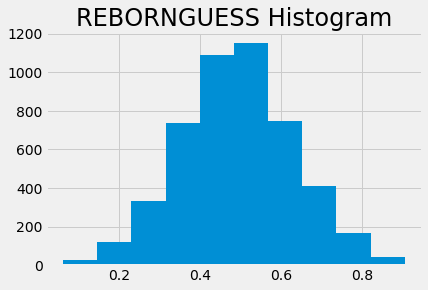

0.4920314476975697
0.13855543099429538
NormaltestResult(statistic=5.887554349455591, pvalue=0.05266642228839581)


In [396]:
plt.style.use('fivethirtyeight')
plt.hist(df2.REBORNGUESS)
plt.title('REBORNGUESS Histogram', fontsize=24)
plt.show()
print(np.mean(df2.REBORNGUESS))
print(np.std(df2.REBORNGUESS))
print(stats.normaltest(df2.REBORNGUESS))

In [382]:
median_guess = np.median(df2.REBORNGUESS) + .051
# that .051 is because more people are not reborn than reborn.
guess = [0,0]
for i in range(len(df2)):
    if abs(df2.REBORNGUESS[i] - .5):
        if df.REBORN.iloc[i] == 1:
            if df2.REBORNGUESS[i] > median_guess:
                guess[0] += 1
            else:
                guess[1] += 1
        elif df.REBORN.iloc[i] == 2:
            if df2.REBORNGUESS[i] < median_guess:
                guess[0] += 1
            else:
                guess[1] += 1
guess_len = guess[0] + guess[1]
guess1 = guess[0]/(guess[0] + guess[1])
guess1_percent = round(100 * (guess[0] + guess[1])/guess_len, 2)

guess = [0,0]
for i in range(len(df2)):
    if abs(df2.REBORNGUESS[i] - .5) > .1:
        if df.REBORN.iloc[i] == 1:
            if df2.REBORNGUESS[i] > median_guess:
                guess[0] += 1
            else:
                guess[1] += 1
        elif df.REBORN.iloc[i] == 2:
            if df2.REBORNGUESS[i] < median_guess:
                guess[0] += 1
            else:
                guess[1] += 1
guess2 = guess[0]/(guess[0] + guess[1])
guess2_percent = round(100 * (guess[0] + guess[1])/guess_len, 2)

guess = [0,0]
for i in range(len(df2)):
    if abs(df2.REBORNGUESS[i] - .5) > .2:
        if df.REBORN.iloc[i] == 1:
            if df2.REBORNGUESS[i] > median_guess:
                guess[0] += 1
            else:
                guess[1] += 1
        elif df.REBORN.iloc[i] == 2:
            if df2.REBORNGUESS[i] < median_guess:
                guess[0] += 1
            else:
                guess[1] += 1
guess3 = guess[0]/(guess[0] + guess[1])
guess3_percent = round(100 * (guess[0] + guess[1])/guess_len, 2)

guess = [0,0]
for i in range(len(df2)):
    if abs(df2.REBORNGUESS[i] - .5) > .3:
        if df.REBORN.iloc[i] == 1:
            if df2.REBORNGUESS[i] > median_guess:
                guess[0] += 1
            else:
                guess[1] += 1
        elif df.REBORN.iloc[i] == 2:
            if df2.REBORNGUESS[i] < median_guess:
                guess[0] += 1
            else:
                guess[1] += 1
guess4 = guess[0]/(guess[0] + guess[1])
guess4_percent = round(100 * (guess[0] + guess[1])/guess_len, 2)

guess = [0,0]
for i in range(len(df2)):
    if abs(df2.REBORNGUESS[i] - .5) > .35:
        if df.REBORN.iloc[i] == 1:
            if df2.REBORNGUESS[i] > median_guess:
                guess[0] += 1
            else:
                guess[1] += 1
        elif df.REBORN.iloc[i] == 2:
            if df2.REBORNGUESS[i] < median_guess:
                guess[0] += 1
            else:
                guess[1] += 1
guess5 = guess[0]/(guess[0] + guess[1])
guess5_percent = round(100 * (guess[0] + guess[1])/guess_len, 2)

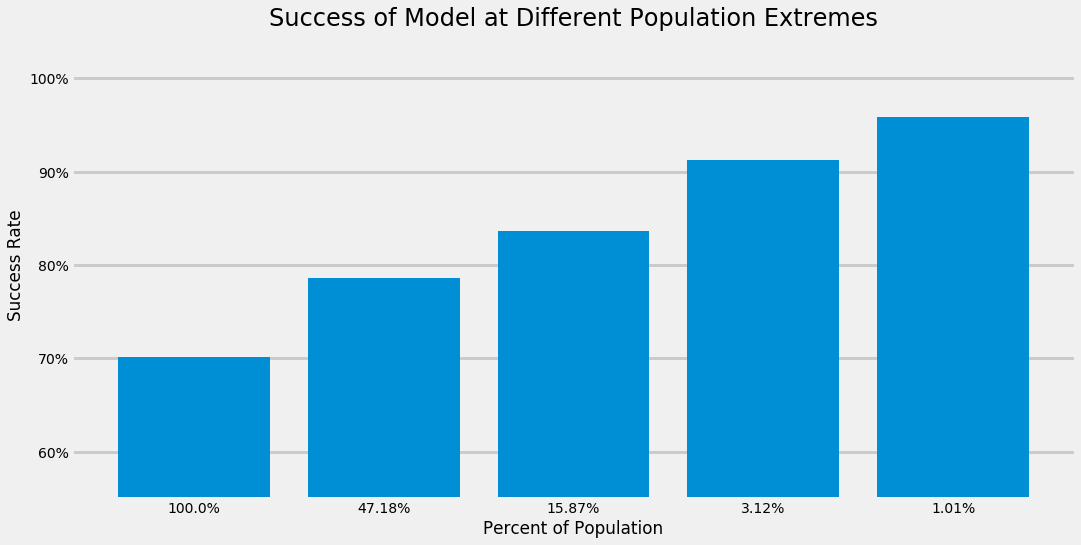

In [394]:
plt.figure(figsize=(16,8))
plt.bar([1, 2, 3, 4, 5],[guess1 * 100, guess2 * 100, guess3 * 100, guess4 * 100, guess5 * 100])
plt.xticks([1, 2, 3, 4, 5], labels=[str(guess1_percent) + '%', str(guess2_percent) + '%', str(guess3_percent) + '%', str(guess4_percent) + '%', str(guess5_percent) + '%'])
plt.yticks([60, 70, 80, 90, 100], labels=['60%', '70%', '80%', '90%', '100%'])
plt.ylim(55,105)
plt.title("Success of Model at Different Population Extremes", fontsize=24)
plt.xlabel('Percent of Population')
plt.ylabel('Success Rate')
plt.grid(axis='y', linewidth=3, zorder=0)
plt.grid(b=False, axis='x')
plt.show()

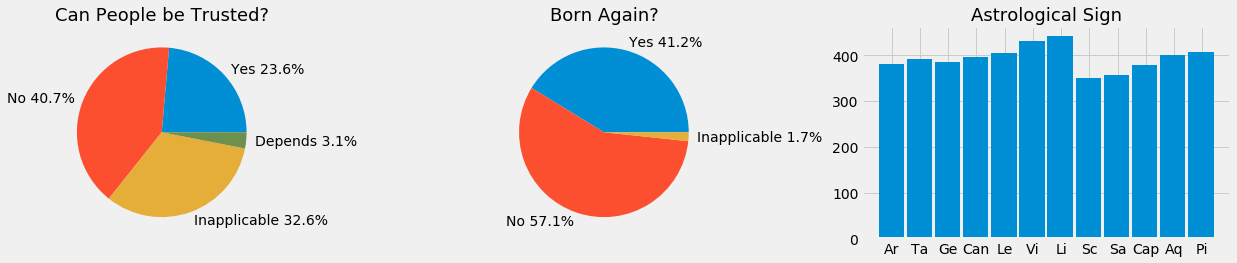

In [398]:
trust_pie = [1138, 1961, 1573, 148]
reborn_pie = [1988,2751,81]
fig = plt.figure(figsize=(20,8))
ax1 = plt.subplot2grid((2,3), (0,0))
plt.pie(trust_pie, labels=('Yes 23.6%','No 40.7%', 'Inapplicable 32.6%', 'Depends 3.1%'))
plt.title('Can People be Trusted?', fontsize=18)

ax1 = plt.subplot2grid((2, 3), (0, 1))
plt.pie(reborn_pie, labels=('Yes 41.2%', 'No 57.1%', 'Inapplicable 1.7%'))
plt.title('Born Again?', fontsize=18)

ax1 = plt.subplot2grid((2, 3), (0, 2))
plt.hist(df.ZODIAC[df.ZODIAC < 98], bins=12, rwidth=.9)
plt.title('Astrological Sign', fontsize=18)
plt.xticks(np.arange(1.47,12,.92), labels=['Ar', 'Ta', 'Ge', 'Can', 'Le', 'Vi', 'Li', 'Sc', 'Sa', 'Cap', 'Aq', 'Pi'])

plt.show()

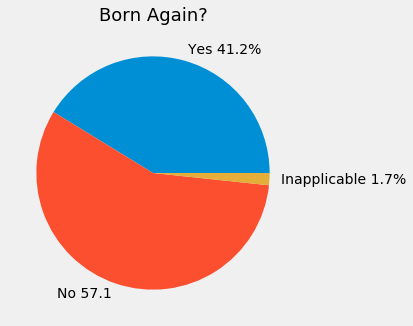

In [311]:
plt.figure(figsize=(10,5))
plt.pie(reborn_pie, labels=('Yes 41.2%', 'No 57.1', 'Inapplicable 1.7%'))
plt.title('Born Again?', fontsize=18)
plt.show()